In [128]:
import numpy as np
import pandas as pd
import time
from bayesiankalman import mcmc
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri

In [41]:
%matplotlib inline

In [119]:
fracdiff = importr('fracdiff')
numpy2ri.activate() 

In [63]:
VIX = pd.read_csv('Data/VIX_2011_01-2016_04.csv')

In [64]:
VIX.head()

,Date,vixo,vixh,vixl,vix
0,03JAN2011,17.94,17.95,16.91,17.61
1,04JAN2011,17.34,18.24,17.33,17.38
2,05JAN2011,17.81,17.95,16.86,17.02
3,06JAN2011,16.80,17.56,16.79,17.40
4,07JAN2011,17.31,18.07,16.57,17.14


In [70]:
vix = pd.Series(VIX['vix'].values, index=pd.to_datetime(VIX['Date'],format='%d%b%Y'))

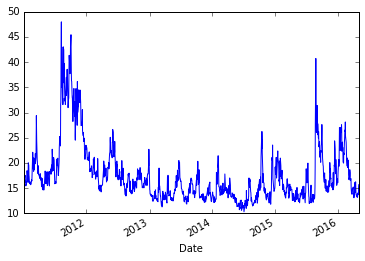

In [72]:
vix.plot()

In [84]:
results = mcmc.read_nested_hdf('/home/sangrey/Repositories/LongMemoryModel/results/cond_gp_model.with_mean.hdf')
estimates = {pd.to_datetime(key, format='%B_%d_%Y') : item for key, item in results['results'].items()}

In [97]:
last_day = np.sort(list(estimates.keys()))[-1]
present_dates = np.unique(estimates[last_day]['dates'].astype('datetime64[D]'))
ivols = estimates[last_day]['ivols']
ivols_df = pd.DataFrame(np.median(estimates[last_day]['ivols'].T, axis=1),index=present_dates)


In [140]:
d, sd_asymp, sd_reg = fracdiff.fdGPH(np.log(vix.values))

In [143]:
sd_reg

<FloatVector - Python:0x7f353d6dd888 / R:0x1d0d2388>
[0.075388]